In [ ]:
pip install spotipy
pip install matplotlib
pi install pandas
pip install scikit-learn
pip install pydotplus
##installing required packages

In [36]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util


cid ='4a8f691d58c34c059a235249fa877f6e' # Client ID; copy this from your app created on beta.developer.spotify.com
secret = '9b9a8e97d24c4688abb5f188a2d80de3' # Client Secret; copy this from your app
username = 'Your Spotify username' # Your Spotify username 

#for avaliable scopes see https://developer.spotify.com/web-api/using-scopes/
scope = 'user-library-read playlist-modify-public playlist-read-private'

redirect_uri='http://localhost:3000/callback'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

token = util.prompt_for_user_token(username, scope, cid, secret, redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

In [37]:
import pandas as pd

sourcePlaylistID = 'PlaylistId'
sourcePlaylist = sp.user_playlist(username, sourcePlaylistID);
tracks = sourcePlaylist["tracks"];
songs = tracks["items"];

track_ids = []
track_names = []

for i in range(0, len(songs)):
    if songs[i]['track']['id'] != None: 
        track_ids.append(songs[i]['track']['id'])
        track_names.append(songs[i]['track']['name'])

features = []
for i in range(0,len(track_ids)):
    audio_features = sp.audio_features(track_ids[i])
    for track in audio_features:
        features.append(track)
        
playlist_df = pd.DataFrame(features, index = track_names)

In [38]:
playlist_df.head() ##ipo ee data frame il playlist full kitum namak

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
Rewrite the Stars,0.563,0.580,10,-6.320,1,0.0452,0.538,0.000000,0.0983,0.172,124.639,audio_features,2aGe2QASqeH8D2aa1doPfk,spotify:track:2aGe2QASqeH8D2aa1doPfk,https://api.spotify.com/v1/tracks/2aGe2QASqeH8...,https://api.spotify.com/v1/audio-analysis/2aGe...,216895,4
Alag Aasmaan,0.699,0.299,6,-12.599,1,0.0403,0.869,0.000000,0.0724,0.459,118.969,audio_features,74kCarkFBzXYXNkkYJIsG0,spotify:track:74kCarkFBzXYXNkkYJIsG0,https://api.spotify.com/v1/tracks/74kCarkFBzXY...,https://api.spotify.com/v1/audio-analysis/74kC...,212773,4
Pinneyum Pinneyum,0.592,0.481,5,-10.226,1,0.0317,0.559,0.000023,0.3250,0.483,138.910,audio_features,1om6ncsZgUHQNjXeSuy9dM,spotify:track:1om6ncsZgUHQNjXeSuy9dM,https://api.spotify.com/v1/tracks/1om6ncsZgUHQ...,https://api.spotify.com/v1/audio-analysis/1om6...,303920,5
Paadam Pootha - Male Version,0.417,0.533,1,-6.086,1,0.0552,0.797,0.130000,0.1160,0.791,82.153,audio_features,05VW0zc0acD60f4TYyRmZl,spotify:track:05VW0zc0acD60f4TYyRmZl,https://api.spotify.com/v1/tracks/05VW0zc0acD6...,https://api.spotify.com/v1/audio-analysis/05VW...,235027,3
Maathey - Live Version,0.515,0.454,2,-12.004,1,0.1010,0.317,0.000000,0.1740,0.362,120.022,audio_features,3qg6YvoJDxxZReMXqovCQh,spotify:track:3qg6YvoJDxxZReMXqovCQh,https://api.spotify.com/v1/tracks/3qg6YvoJDxxZ...,https://api.spotify.com/v1/audio-analysis/3qg6...,392612,4


In [39]:

playlist_df=playlist_df[["id", "acousticness", "danceability", "duration_ms", 
                         "energy", "instrumentalness",  "key", "liveness",
                         "loudness", "mode", "speechiness", "tempo", "valence"]]
playlist_df.head() ##enit avishyam ullla colums mattram edukum 

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
Rewrite the Stars,2aGe2QASqeH8D2aa1doPfk,0.538,0.563,216895,0.580,0.000000,10,0.0983,-6.320,1,0.0452,124.639,0.172
Alag Aasmaan,74kCarkFBzXYXNkkYJIsG0,0.869,0.699,212773,0.299,0.000000,6,0.0724,-12.599,1,0.0403,118.969,0.459
Pinneyum Pinneyum,1om6ncsZgUHQNjXeSuy9dM,0.559,0.592,303920,0.481,0.000023,5,0.3250,-10.226,1,0.0317,138.910,0.483
Paadam Pootha - Male Version,05VW0zc0acD60f4TYyRmZl,0.797,0.417,235027,0.533,0.130000,1,0.1160,-6.086,1,0.0552,82.153,0.791
Maathey - Live Version,3qg6YvoJDxxZReMXqovCQh,0.317,0.515,392612,0.454,0.000000,2,0.1740,-12.004,1,0.1010,120.022,0.362


In [40]:
import numpy as np
N = 30
K = 15 # K zeros, N-K ones
arr = np.array([1] * K + [0] * (N-K))


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0])

In [41]:
playlist_df['isLike']=arr ##ennit data frame il new colum ayit athina add akunnu array na

In [42]:
playlist_df.head() ##ipo data frame il last column is islike vannu kanum

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,isLike
Rewrite the Stars,2aGe2QASqeH8D2aa1doPfk,0.538,0.563,216895,0.580,0.000000,10,0.0983,-6.320,1,0.0452,124.639,0.172,1
Alag Aasmaan,74kCarkFBzXYXNkkYJIsG0,0.869,0.699,212773,0.299,0.000000,6,0.0724,-12.599,1,0.0403,118.969,0.459,1
Pinneyum Pinneyum,1om6ncsZgUHQNjXeSuy9dM,0.559,0.592,303920,0.481,0.000023,5,0.3250,-10.226,1,0.0317,138.910,0.483,1
Paadam Pootha - Male Version,05VW0zc0acD60f4TYyRmZl,0.797,0.417,235027,0.533,0.130000,1,0.1160,-6.086,1,0.0552,82.153,0.791,1
Maathey - Live Version,3qg6YvoJDxxZReMXqovCQh,0.317,0.515,392612,0.454,0.000000,2,0.1740,-12.004,1,0.1010,120.022,0.362,1


In [43]:
playlist_df=playlist_df.sort_values(by='id', ascending=False)
playlist_df.head(10) ## id vechit sort chyunnu 

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,isLike
Devastation,7JlMigJUTnVlmXODusrtdF,0.00006,0.501,221748,0.988,0.000055,1,0.3940,-3.339,1,0.1200,94.953,0.192,0
"Oorigobba Raaja (From ""Yuvarathnaa (Kannada)"")",7IjZQLu1JxHRtNtPELaLAE,0.20800,0.807,219620,0.737,0.000008,7,0.0706,-5.680,1,0.0646,127.985,0.680,0
"Nuvve Nuvve (From ""Red"")",7Ft65MCYElRCDo7jOekQFs,0.25800,0.648,253278,0.885,0.000001,4,0.2410,-2.822,0,0.0445,110.966,0.374,0
Aleva Moda,7B62HLlHbkVc0QaIjilLIW,0.80800,0.601,260424,0.398,0.000000,3,0.1240,-9.109,1,0.0341,119.978,0.388,0
Der Lagi Lekin,78HEXs4YB5SE9JgTHOUdDw,0.04830,0.637,355915,0.675,0.002610,2,0.1250,-7.817,1,0.0296,110.946,0.210,1
Alag Aasmaan,74kCarkFBzXYXNkkYJIsG0,0.86900,0.699,212773,0.299,0.000000,6,0.0724,-12.599,1,0.0403,118.969,0.459,1
Kolumande,6c0rYbuU9xBpFzTzWM5hf4,0.15200,0.769,283495,0.879,0.000131,1,0.1210,-4.552,1,0.0393,127.990,0.559,0
Watermelon Sugar,6UelLqGlWMcVH1E5c4H7lY,0.12200,0.548,174000,0.816,0.000000,0,0.3350,-4.209,1,0.0465,95.390,0.557,1
Solomanum Shoshannayum,66NPP1nDase3JzuEH4ZuEY,0.98700,0.545,258482,0.072,0.000031,11,0.3750,-14.374,1,0.0462,70.519,0.375,1
Ramulo Ramula,5bFlyCShxx4rSZGrZfdhXa,0.11800,0.491,268075,0.809,0.000002,1,0.1030,-7.040,1,0.2120,187.417,0.763,0


In [55]:
playlist_df['isLike'][0:23].values.tolist()

[0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1]

In [44]:
from sklearn.model_selection import train_test_split  
## ithann machine learning module import chyunnath

In [45]:
X= playlist_df.drop(['id', 'isLike'], axis=1) 
Y=playlist_df['isLike']

In [13]:
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.25, random_state=0)  


In [14]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [184]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train) 

KNeighborsClassifier(n_neighbors=4)

In [185]:
y_pred= classifier.predict(x_test)  

In [186]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 

In [187]:
cm

array([[5, 0],
       [1, 2]])

In [188]:
from sklearn import metrics

print(metrics.accuracy_score(y_test, y_pred))

0.875


In [190]:
rec_tracks = []
for i in playlist_df[playlist_df['isLike']==1]['id'].values.tolist():
    rec_tracks += sp.recommendations(seed_tracks=[i], limit=5, max_instrumentalness=max(playlist_df['instrumentalness']), min_instrumentalness=min(playlist_df['instrumentalness']),max_tempo=max(playlist_df['tempo']),min_tempo=min(playlist_df['tempo']))['tracks'];

rec_track_ids = []
rec_track_names = []
for i in rec_tracks:
    rec_track_ids.append(i['id'])
    rec_track_names.append(i['name'])

rec_features = []
for i in range(0,len(rec_track_ids)):
    rec_audio_features = sp.audio_features(rec_track_ids[i])
    for track in rec_audio_features:
        rec_features.append(track)
        
rec_playlist_df = pd.DataFrame(rec_features, index = rec_track_ids)
rec_playlist_df.head() 

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
1hQia6rxgfM1ly2hE3StWp,0.711,0.295,0,-12.377,0,0.0334,0.5340,0.000045,0.0782,0.694,135.041,audio_features,1hQia6rxgfM1ly2hE3StWp,spotify:track:1hQia6rxgfM1ly2hE3StWp,https://api.spotify.com/v1/tracks/1hQia6rxgfM1...,https://api.spotify.com/v1/audio-analysis/1hQi...,257973,4
7FROOyFNVDaTbnnBcghUXL,0.709,0.779,8,-8.187,1,0.0410,0.3340,0.000266,0.3870,0.611,129.022,audio_features,7FROOyFNVDaTbnnBcghUXL,spotify:track:7FROOyFNVDaTbnnBcghUXL,https://api.spotify.com/v1/tracks/7FROOyFNVDaT...,https://api.spotify.com/v1/audio-analysis/7FRO...,262687,4
5JlZLXvZBEFD9u8OoJq6Yh,0.839,0.869,0,-3.005,1,0.1480,0.0817,0.000000,0.3230,0.605,125.026,audio_features,5JlZLXvZBEFD9u8OoJq6Yh,spotify:track:5JlZLXvZBEFD9u8OoJq6Yh,https://api.spotify.com/v1/tracks/5JlZLXvZBEFD...,https://api.spotify.com/v1/audio-analysis/5JlZ...,243166,4
3V3QbgrOZKtFv5MXzAAdZr,0.705,0.740,0,-5.820,1,0.0505,0.0365,0.000000,0.4870,0.928,106.953,audio_features,3V3QbgrOZKtFv5MXzAAdZr,spotify:track:3V3QbgrOZKtFv5MXzAAdZr,https://api.spotify.com/v1/tracks/3V3QbgrOZKtF...,https://api.spotify.com/v1/audio-analysis/3V3Q...,288462,4
1sL8hnnZaB2Xzm1J66y4Tt,0.315,0.461,6,-8.907,1,0.0327,0.6080,0.000000,0.1070,0.274,165.657,audio_features,1sL8hnnZaB2Xzm1J66y4Tt,spotify:track:1sL8hnnZaB2Xzm1J66y4Tt,https://api.spotify.com/v1/tracks/1sL8hnnZaB2X...,https://api.spotify.com/v1/audio-analysis/1sL8...,278493,3


In [191]:
rec_playlist_df=rec_playlist_df[["id","acousticness", "danceability", "duration_ms", 
                         "energy", "instrumentalness",  "key", "liveness",
                         "loudness", "mode", "speechiness", "tempo", "valence"]]

In [192]:
x_final= rec_playlist_df[["acousticness", "danceability", "duration_ms", 
                         "energy", "instrumentalness",  "key", "liveness",
                         "loudness", "mode", "speechiness", "tempo", "valence"]]

In [193]:
rec_playlist_df_scaled = StandardScaler().fit_transform(x_final)

In [194]:
rec_playlist_df_scaled

array([[ 3.97742833e-01,  7.98672163e-01,  9.90940315e-02,
        -1.29430918e+00, -3.05131826e-01, -1.44689096e+00,
        -7.20955735e-01, -1.63282760e+00, -1.41421356e+00,
        -5.00247778e-01,  4.41025170e-01,  6.72517244e-01],
       [-2.99135725e-01,  7.83587697e-01,  1.86076458e-01,
         1.05110931e+00, -2.55801848e-01,  1.09895824e+00,
         1.72815978e+00, -1.68873040e-01,  7.07106781e-01,
        -3.65778911e-01,  2.16316581e-01,  3.21168990e-01],
       [-1.17824803e+00,  1.76407795e+00, -1.74123786e-01,
         1.48724085e+00, -3.15203270e-01, -1.44689096e+00,
         1.22057107e+00,  1.64167888e+00,  7.07106781e-01,
         1.52740120e+00,  6.71330754e-02,  2.95770322e-01],
       [-1.33574258e+00,  7.53418766e-01,  6.61675111e-01,
         8.62118977e-01, -3.15203270e-01, -1.44689096e+00,
         2.52126713e+00,  6.58139001e-01,  7.07106781e-01,
        -1.97692826e-01, -6.07590023e-01,  1.66306533e+00],
       [ 6.55587900e-01, -2.18805199e+00,  4.7772776

In [195]:
y_pred=classifier.predict(rec_playlist_df_scaled)

In [196]:
rec_playlist_df['isLike']=np.array(y_pred)

In [197]:
recs_to_add =rec_playlist_df[rec_playlist_df['isLike']==1]['id'].values.tolist()

In [198]:
playlist_recs = sp.user_playlist_create(username, 
                                        name='KNN Playlist 2')

In [199]:
len(recs_to_add)

38

In [200]:
sp.user_playlist_add_tracks(username, playlist_recs['id'], recs_to_add);

In [1]:
##Descicion Tree

In [17]:
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [19]:
features=["acousticness", "danceability", "duration_ms", 
                         "energy", "instrumentalness",  "key", "liveness",
                         "loudness", "mode", "speechiness", "tempo", "valence"]

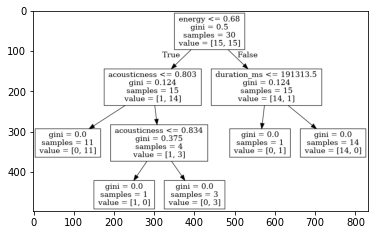

In [23]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, Y)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

In [63]:
from sklearn import neighbors 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt


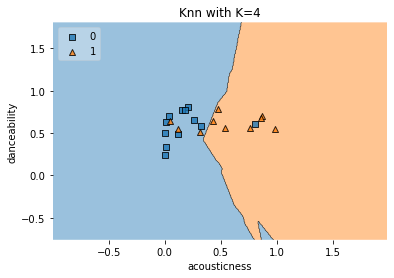

In [64]:
x_plot = playlist_df[['acousticness','danceability']][0:22].values
plot = np.array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1])
k=4
clf = neighbors.KNeighborsClassifier(n_neighbors=k)
clf.fit(x_plot, y_plot)
# Plotting decision region
plot_decision_regions(x_plot, y_plot, clf=clf, legend=2)
# Adding axes annotations
plt.xlabel("acousticness")
plt.ylabel("danceability")
plt.title("Knn with K="+ str(k))
plt.show()
